# PyTorch for CIFAR10
We test VGG classifier.
First init some basic environment.

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# VGG16 classifier

In [11]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10_solver import CIFAR10Solver, plot_history
from classifiers.vgg import VGG16

vgg = VGG16()
print(vgg)

_VGG(
  (layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),

# train

In [12]:
%%time
opt = optim.SGD(vgg.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4, nesterov=True)
loss_fn = nn.CrossEntropyLoss()
solver = CIFAR10Solver(vgg, opt, loss_fn)
reduce_lr = lambda epoch: 0.5 ** (epoch // 50)
lr_scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=[reduce_lr])
# scheduler = optim.lr_scheduler.MultiStepLR(opt, milestones=[80, 130], gamma=0.1)
# lr_scheduler = None
history = solver.train(epochs=200, lr_scheduler=lr_scheduler, train_batch_size=128)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0
start training. epoch steps: 352
Epoch: 1/200, lr:1.00e-01
[##################################################] 100.00% loss:2.1 acc:18.71% val_loss:1.9 val_acc:25.66%
Epoch: 2/200, lr:1.00e-01
[##################################################] 100.00% loss:1.7 acc:35.65% val_loss:1.5 val_acc:42.46%
Epoch: 3/200, lr:1.00e-01
[##################################################] 100.00% loss:1.2 acc:55.38% val_loss:1.4 val_acc:52.10%
Epoch: 4/200, lr:1.00e-01
[##################################################] 100.00% loss:0.99 acc:64.92% val_loss:1.1 val_acc:62.58%
Epoch: 5/200, lr:1.00e-01
[##################################################] 100.00% loss:0.85 acc:70.64% val_loss:0.89 val_acc:70.50%
Epoch: 6/200, lr:1.00e-01
[##################################################] 100.00% loss:0.76 acc:74.17% val_loss:0.81 val_acc:72.94%
Epoch: 7/200, 

[##################################################] 100.00% loss:0.24 acc:91.88% val_loss:0.52 val_acc:84.98%
Epoch: 60/200, lr:5.00e-02
[##################################################] 100.00% loss:0.25 acc:91.64% val_loss:0.48 val_acc:85.54%
Epoch: 61/200, lr:5.00e-02
[##################################################] 100.00% loss:0.24 acc:91.86% val_loss:0.43 val_acc:86.94%
Epoch: 62/200, lr:5.00e-02
[##################################################] 100.00% loss:0.24 acc:91.99% val_loss:0.41 val_acc:87.04%
Epoch: 63/200, lr:5.00e-02
[##################################################] 100.00% loss:0.25 acc:91.80% val_loss:0.46 val_acc:85.82%
Epoch: 64/200, lr:5.00e-02
[##################################################] 100.00% loss:0.24 acc:91.98% val_loss:0.42 val_acc:87.46%
Epoch: 65/200, lr:5.00e-02
[##################################################] 100.00% loss:0.24 acc:92.05% val_loss:0.48 val_acc:85.42%
Epoch: 66/200, lr:5.00e-02
[#################################

[##################################################] 100.00% loss:0.12 acc:95.72% val_loss:0.42 val_acc:88.98%
Epoch: 119/200, lr:2.50e-02
[##################################################] 100.00% loss:0.12 acc:95.86% val_loss:0.34 val_acc:90.12%
Epoch: 120/200, lr:2.50e-02
[##################################################] 100.00% loss:0.13 acc:95.70% val_loss:0.33 val_acc:90.52%
Epoch: 121/200, lr:2.50e-02
[##################################################] 100.00% loss:0.12 acc:95.83% val_loss:0.36 val_acc:89.68%
Epoch: 122/200, lr:2.50e-02
[##################################################] 100.00% loss:0.13 acc:95.77% val_loss:0.4 val_acc:89.10%
Epoch: 123/200, lr:2.50e-02
[##################################################] 100.00% loss:0.12 acc:95.85% val_loss:0.5 val_acc:87.32%
Epoch: 124/200, lr:2.50e-02
[##################################################] 100.00% loss:0.12 acc:95.95% val_loss:0.34 val_acc:90.22%
Epoch: 125/200, lr:2.50e-02
[############################

[##################################################] 100.00% loss:0.055 acc:98.19% val_loss:0.4 val_acc:89.90%
Epoch: 178/200, lr:1.25e-02
[##################################################] 100.00% loss:0.065 acc:97.87% val_loss:0.37 val_acc:90.54%
Epoch: 179/200, lr:1.25e-02
[##################################################] 100.00% loss:0.062 acc:97.91% val_loss:0.33 val_acc:91.08%
Epoch: 180/200, lr:1.25e-02
[##################################################] 100.00% loss:0.061 acc:98.03% val_loss:0.32 val_acc:91.42%
Epoch: 181/200, lr:1.25e-02
[##################################################] 100.00% loss:0.065 acc:97.88% val_loss:0.36 val_acc:90.68%
Epoch: 182/200, lr:1.25e-02
[##################################################] 100.00% loss:0.062 acc:97.87% val_loss:0.39 val_acc:89.86%
Epoch: 183/200, lr:1.25e-02
[##################################################] 100.00% loss:0.062 acc:97.91% val_loss:0.37 val_acc:90.76%
Epoch: 184/200, lr:1.25e-02
[####################

# plot loss history
We check the classifier by plotting the loss and acc.

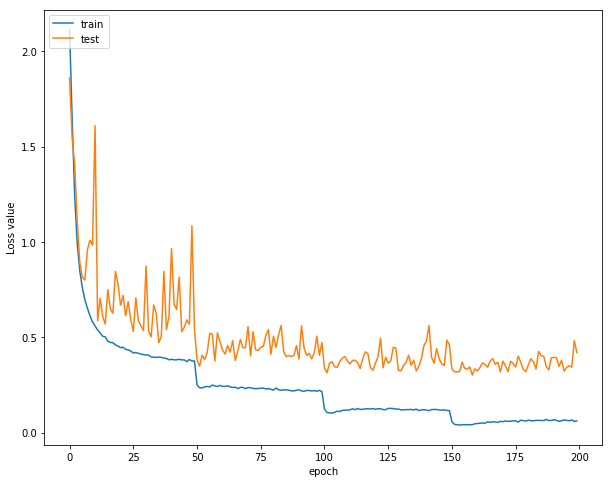

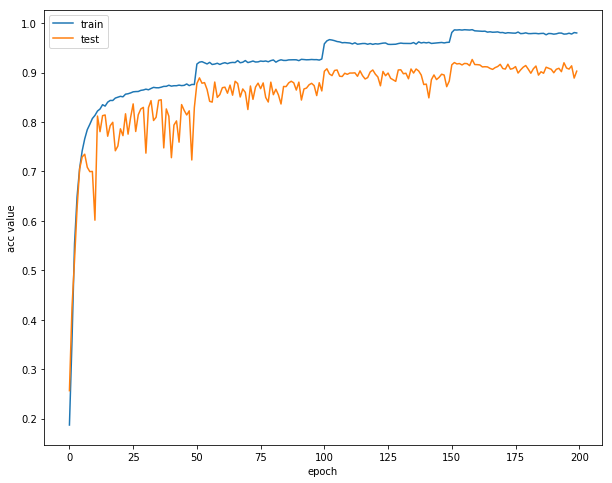

In [13]:
plot_history(history)

# test classifier
test on test data

In [14]:
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.4} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:0.4199 test_acc:90.28%
